# The Machine Learning Landscape

- The first ML application that really became maintream and improved the lives of 100s of millions of people took over in the 1990s, **The Spam Filter**.
- We will take a look at the map and learn about the most notable regions of ML
    - Supervised versus Unsupervised Learning
    - Online versus batch learning
    - Instance-based versus model-based learning

## What is Machine Learning?
- Machine Learning is the science (and art) of programming computers so that they can learn from data.
- Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed. — Arthur Samuel (1959)
- A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$. — Tom Mitchell (1997).

## Why use Machine Learning?
1. Make rules
2. Write Algorithm
3. If Algorithm performs well $\to$ deploy. If not, go to (1).

- If the problem is complex, you'll likely endup with a long list of rules that are hard to maintain to scale to other similar problems.
- A machine learning approach would be much shorter, easier to maintain, and in many cases, more accurate.
- Machine Learning can help humans learn.
    - You can train an algorithm on a large dataset, then inspect the algorithm for `feature importance` to gain a better understanding of the relation between the data & the problem.
    - This is called data mining.

## Examples of Applications

- Image Classification: typically performed using convolutional neural networks
- Semantic segmentation: when we want to classify each pixel in an image, example is brain tumor detection (will give us shape and location)
- Natural Language Processing: & More specifically, text classification, which can be performed using RNNs, CNNs, or Transformers.
- NLP: Automatic Text Summarization
- Chatbot: Involves many NLP tasks such as Natural Language Understanding (NLU) and Question-Answering.
- Forecasting your company's revenue next year: a regression task that can be tackled using multiple algorithms such as
    - Linear Regression
    - Polynomial Regression
    - SVM
    - Random Forest
    - Artificial Neural Networks
    - If sequences of past performance indicators are involved, we can use RNNs, CNNs or Transformers.
- Making your app react to voice commands: This is speech recognition, can be tackled by recognizing the incoming audio signals using RNNs, CNNs or Transformers.
- Detecting credit card fraud: this is anomaly detection.
- Segmenting clients based on their purchases so you can design targeted more effective marketing campaigns, a Clustering problem
- Representing a complex, high-dimensional dataset in a diagram: this is data visualization, typically using dimensionality reduction algorithms such as PCA.
- Recommending a product based on the client's purchases history: this is a recommender system, where you can feed in the sequence of purchases to an artificial neural network to predict the next purchase.
- Building an intelligent bot for a game: this is usually solved using reinforcement learning

## Types of Machine Learning Systems

- Supervised/Unsupervised Learning
    - Machine learning algorithms can be classified according to the amount of supervision they get during training
    - They are 4 major categories
        - Supervised Learning
            - The training set you feed into the supervised learning algorithm contains the targets/labels/desired predictions.
            - Most supervised learning tasks fall under two umbrellas: Classification/Regression
            - Some regression-based models are used for classification as well, such as `Logistic Regression` which outputs a probability $\in [0,1]$
            - Here are some of the most important supervised learning algorithms
                - K-nearest Neighbors
                - Linear Regression
                - Logistic Regression
                - Decision Trees and Random Forests
                - Artificial Neural Networks
                - Naive Bayes
        - Semi-supervised Learning
        - Reinforcement Learning
        - Unsupervised Learning
            - The data is unlabeled, the system is trying to learn without a teacher.
            - Here are some unsupervised learning algorithms
                - Clustering
                    - K-means
                    - DBSCAN
                    - Hirerchical Cluster Analysis
                - Anomaly Detection
                    - one-class SVM
                    - Isolation Forest
                - Visualization & Dimensionality Reduction: the goal is to compress/simplify the data without losing too much information (1 way to do it is to merge highly correlated features)
                    - Principal Component Analysis: PCA
                    - t-distributed stochastic Neighbor Embedding: T-SNE
                    - Autoencoders
                    - Kernel PCA
                    - Local Linear Embedding (LLE)
                - Association rule learning: find interesting relations between attributes
                    - Apriori
                    - Eclat
        - Semi-supervised Learning
            - You have partially-labeled data
            - The goal is to not classify the unlebeled ones but to use them around the labeled points as helpers to solve the task
            - Most semi-supervised learning algorithms are a combination of unsupervised and supervised learning algorithms
        - Reinforcement Learning
            - RL is a very different beast.
            - An agent observes the environment, selects an action, gets a reward, and updates its policy.
- Batch & Online Learning
    - Another criterion to classify a machine learning algorithm is whether it learns from an incoming stream of data or not.
    - Batch Learning
        - In batch learning, the model is incapable of incrementally learning, It first learns from all of the available data offline, and then get deployed to produce predictions without feeding it any new data points.
        - Another name of batch learning is Offline Learning.
    - Online Learning
        - In online learning, you train data incrementally by continuously feeding it data instances as they come.
            - Either individually or in small groups of instances called *mini-batches*.
        - Each learning step is fast and cheap, so the system can learn as data comes, on the fly.
        - Online learning is great for system that receive data in a continuous flow.
        - Think about Online learning as incremental learning.
        - One important aspect of online learning is how fast the learning algorithm should adapt to new data points
            - With a big learning rate — the model tends to forget past data and lean heavily towards new data points.
            - With a small learning rate — the model tends to slightly adapt to new data points but keeps its knowledge on old data points mostly intact.
        - A big challenge with online learning algorithms is that they can be damaged with bad incoming data points and clients will notice that on the fly
            - To mitigate this, you can:
                - Closely monitor the system through performance metrics, turn off online learning or revert back to a previous model state.
                - Clean the data before feeding it to the model by scanning it for anomaly/outlier detection
- Instance-based versus Model-based Learning
    - One other way to categorize machine learning algorithms is how they generalize
    - There are two approaches to generalization: instance-based approaches and model-based approaches.
    - Instance-based Learning
        - Similarity-based comparison, a new data point would be classified based on its similarity to the target group in the training set, this would require a measure of similarity.
    - Model-based Learning
        - Another way to make predictions is to build a model for each class of data points and then use the model to classify a new data point (from the validation/test/production environment).
        - What follows is an example of model-based learning using linear regression:

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [71]:
# URLs for data
gdp_data_url = 'https://educational-data-samples.s3.amazonaws.com/books/hands-on-ML/WEO_Data.csv'
oecd_data_url = 'https://educational-data-samples.s3.amazonaws.com/books/hands-on-ML/OECD.csv'

In [72]:
# get data & import it as a dataframe
gdp = pd.read_csv(gdp_data_url, sep='\t', encoding='latin1', thousands=',', na_values='n/a').dropna()
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [73]:
# get oecd data & import it as a dataframe
oecd = pd.read_csv(oecd_data_url, thousands=',')[['Country', 'Indicator', 'Measure', 'Inequality', 'Unit', 'PowerCode', 'Value']]
oecd.head()

,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Labour market insecurity,Value,Total,Percentage,Units,5.4
1,Austria,Labour market insecurity,Value,Total,Percentage,Units,3.5
2,Belgium,Labour market insecurity,Value,Total,Percentage,Units,3.7
3,Canada,Labour market insecurity,Value,Total,Percentage,Units,6.0
4,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,3.1


In [74]:
# Get countries + Life satisfaction
oecd = oecd[['Country', 'Value']][oecd['Indicator'] == 'Life satisfaction']
oecd = oecd.rename(columns={'Value': 'Life satisfaction'})
oecd.head()

,Country,Life satisfaction
1812,Australia,7.3
1813,Austria,7.1
1814,Belgium,6.9
1815,Canada,7.4
1816,Czech Republic,6.7


In [75]:
# Get countries + GDP
gdp = gdp[['Country', '2015']]
gdp = gdp.rename(columns={'2015': 'GDP per capita (USD)'})
# filter to get a similar dataframe to the book's
gdp = gdp[gdp['GDP per capita (USD)'] <= 60000]
gdp.head()

,Country,GDP per capita (USD)
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [76]:
# Join GDP & Life satisfaction tables + Group by country as the unique column and average-aggregate GDP & Life satisfaction
country_stats = pd.merge(gdp, oecd, on='Country').groupby(['Country']).mean().reset_index()
country_stats.head()

,Country,GDP per capita (USD),Life satisfaction
0,Australia,50961.865,7.350
1,Austria,43724.031,7.225
2,Belgium,40106.632,7.000
3,Brazil,8669.998,6.400
4,Canada,43331.961,7.425


In [90]:
# get GDP for the x-axis and Life Satisfaction for the y-axis
X = country_stats['GDP per capita (USD)'].values.reshape(-1, 1)
y = country_stats['Life satisfaction'].values.reshape(-1, 1)
X.shape, y.shape

((37, 1), (37, 1))

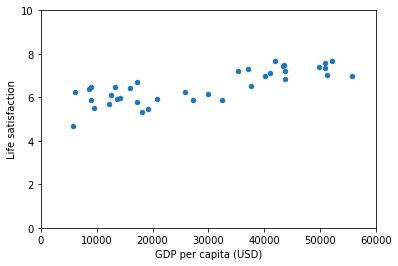

In [91]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.show()

In [92]:
# Select a Linear Model
model = sklearn.linear_model.LinearRegression()

In [93]:
# Train the Model
model.fit(X, y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus GDP per capita
print(model.predict(X_new))

[[6.2910907]]


---